<a href="https://colab.research.google.com/github/dataexpert-moon/class_ai4dl/blob/demo-repo/week4/%EB%94%A5%EB%9F%AC%EB%8B%9D_4%EC%A3%BC%EC%B0%A8_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [58]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [59]:
len(train_data)

25000

In [60]:
len(test_data)

25000

In [61]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [62]:
train_labels[0]

1

In [63]:
[ 3*i if (i*3 > 5) else 0 for i in range(3)]

[0, 0, 6]

In [64]:
[3*i for i in range(3) if (i*3 > 5)]

[6]

In [65]:
max(train_data[0])

7486

In [66]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [67]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [68]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [69]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [70]:
[reverse_word_index.get(i - 3, "?") for i in train_data[0]]

['?',
 'this',
 'film',
 'was',
 'just',
 'brilliant',
 'casting',
 'location',
 'scenery',
 'story',
 'direction',
 "everyone's",
 'really',
 'suited',
 'the',
 'part',
 'they',
 'played',
 'and',
 'you',
 'could',
 'just',
 'imagine',
 'being',
 'there',
 'robert',
 '?',
 'is',
 'an',
 'amazing',
 'actor',
 'and',
 'now',
 'the',
 'same',
 'being',
 'director',
 '?',
 'father',
 'came',
 'from',
 'the',
 'same',
 'scottish',
 'island',
 'as',
 'myself',
 'so',
 'i',
 'loved',
 'the',
 'fact',
 'there',
 'was',
 'a',
 'real',
 'connection',
 'with',
 'this',
 'film',
 'the',
 'witty',
 'remarks',
 'throughout',
 'the',
 'film',
 'were',
 'great',
 'it',
 'was',
 'just',
 'brilliant',
 'so',
 'much',
 'that',
 'i',
 'bought',
 'the',
 'film',
 'as',
 'soon',
 'as',
 'it',
 'was',
 'released',
 'for',
 '?',
 'and',
 'would',
 'recommend',
 'it',
 'to',
 'everyone',
 'to',
 'watch',
 'and',
 'the',
 'fly',
 'fishing',
 'was',
 'amazing',
 'really',
 'cried',
 'at',
 'the',
 'end',
 'it',

In [71]:
train_data[0][:5]

[1, 14, 22, 16, 43]

In [72]:
reverse_word_index.get(1 - 3, "?")

'?'

In [73]:
reverse_word_index.get(14 - 3, "?")

'this'

In [74]:
reverse_word_index.get(22 - 3, "?")

'film'

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [75]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [76]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [77]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [78]:
# 3장-1번 문제 히든층 홀수로
# 3장-2번 문제 층 안에 유닛수 줄이기
# 3장-4번 문제 relu -> tanh로
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [79]:
# 3장-3번 문제 loss 함수 변경
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [80]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [81]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 7s 76ms/step - loss: 0.2259 - accuracy: 0.7028 - val_loss: 0.1719 - val_accuracy: 0.8397
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1299 - accuracy: 0.8666 - val_loss: 0.1260 - val_accuracy: 0.8382
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0814 - accuracy: 0.9077 - val_loss: 0.0920 - val_accuracy: 0.8786
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0623 - accuracy: 0.9257 - val_loss: 0.0859 - val_accuracy: 0.8856
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0505 - accuracy: 0.9400 - val_loss: 0.0923 - val_accuracy: 0.8771
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0410 - accuracy: 0.9518 - val_loss: 0.1249 - val_accuracy: 0.8345
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0338 - accuracy: 0.9615 - val_loss: 0.1015 - val_accuracy: 0.8689
Epoch 8/20
30

In [82]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

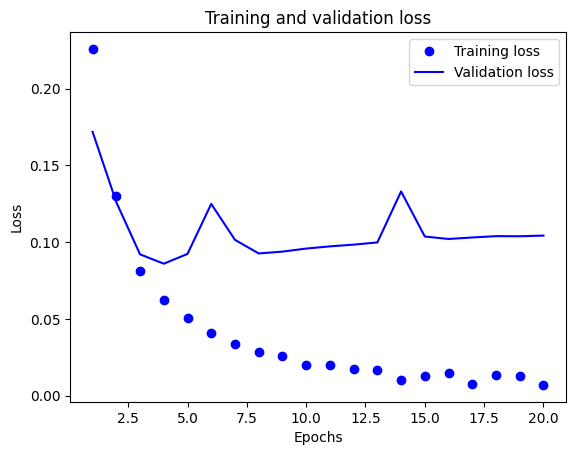

In [83]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

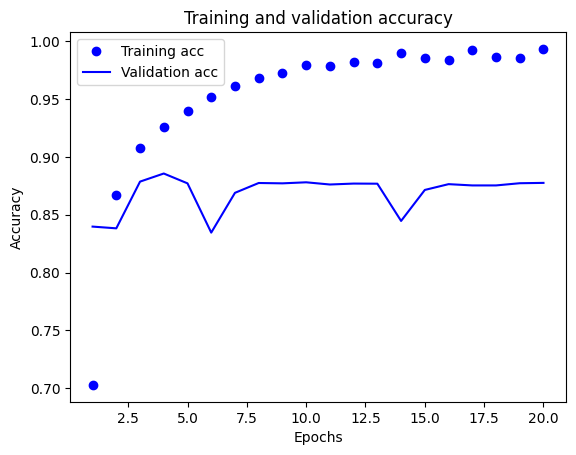

In [84]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [85]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 14ms/step - loss: 0.4615 - accuracy: 0.8054
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2713 - accuracy: 0.9037
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2128 - accuracy: 0.9239
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.3096 - accuracy: 0.8764


In [86]:
# 가장 좋은 모델을 찾는 것은 어렵다.
# 예측 정확도의 결과값은 신경망의 유닛수를 늘리거나 줄여도, 크게 다르지 않았다.
results


[0.30960220098495483, 0.8763599991798401]

### Using a trained model to generate predictions on new data

In [87]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.2508911 ],
       [0.99937505],
       [0.97604793],
       ...,
       [0.16409439],
       [0.11598597],
       [0.7622614 ]], dtype=float32)

### Further experiments

### Wrapping up

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [88]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [89]:
len(train_data)

8982

In [90]:
len(test_data)

2246

In [91]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [92]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [93]:
train_labels[10]

3

### Preparing the data

**Encoding the input data**

In [94]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [95]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [96]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [97]:
train_labels[:10]

array([ 3,  4,  3,  4,  4,  4,  4,  3,  3, 16])

### Building your model

**Model definition**

In [98]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [99]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [100]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [101]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 45ms/step - loss: 2.6978 - accuracy: 0.4384 - val_loss: 1.8461 - val_accuracy: 0.6030
Epoch 2/20
16/16 [==============================] - 0s 20ms/step - loss: 1.5854 - accuracy: 0.6705 - val_loss: 1.4068 - val_accuracy: 0.6890
Epoch 3/20
16/16 [==============================] - 0s 26ms/step - loss: 1.2282 - accuracy: 0.7276 - val_loss: 1.2327 - val_accuracy: 0.7260
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 1.0100 - accuracy: 0.7816 - val_loss: 1.1241 - val_accuracy: 0.7500
Epoch 5/20
16/16 [==============================] - 0s 19ms/step - loss: 0.8379 - accuracy: 0.8190 - val_loss: 1.0509 - val_accuracy: 0.7610
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.7025 - accuracy: 0.8494 - val_loss: 0.9808 - val_accuracy: 0.8010
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 0.5860 - accuracy: 0.8743 - val_loss: 0.9441 - val_accuracy: 0.8080
Epoch 8/20
16

**Plotting the training and validation loss**

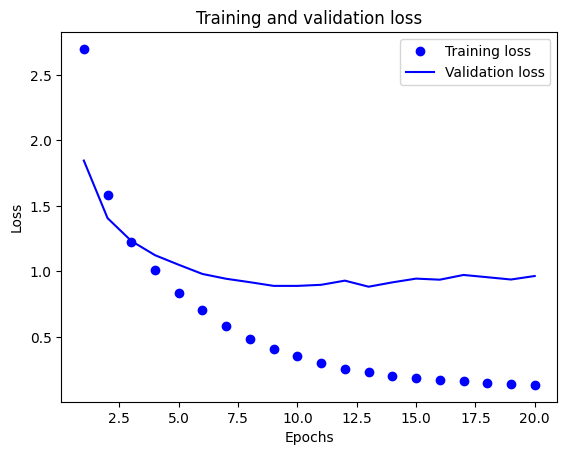

In [102]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

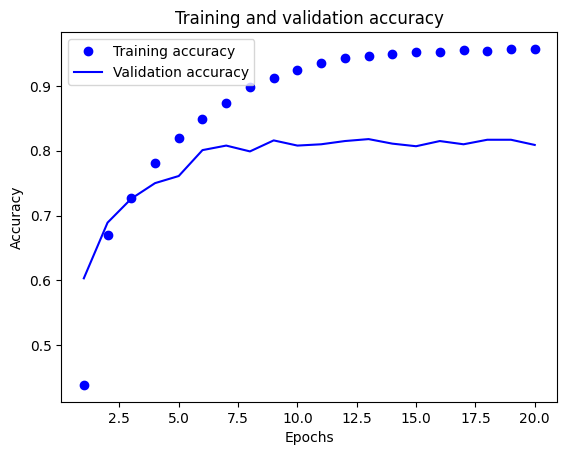

In [103]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [104]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 14ms/step - loss: 2.5232 - accuracy: 0.5645
Epoch 2/9
18/18 [==============================] - 0s 14ms/step - loss: 1.4795 - accuracy: 0.7037
Epoch 3/9
18/18 [==============================] - 0s 13ms/step - loss: 1.1110 - accuracy: 0.7653
Epoch 4/9
18/18 [==============================] - 0s 14ms/step - loss: 0.9004 - accuracy: 0.8105
Epoch 5/9
18/18 [==============================] - 0s 15ms/step - loss: 0.7486 - accuracy: 0.8448
Epoch 6/9
18/18 [==============================] - 0s 13ms/step - loss: 0.6338 - accuracy: 0.8734
Epoch 7/9
18/18 [==============================] - 0s 14ms/step - loss: 0.5423 - accuracy: 0.8927
Epoch 8/9
18/18 [==============================] - 0s 14ms/step - loss: 0.4674 - accuracy: 0.9055
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.8590 - accuracy: 0.8041


In [105]:
results

# 원래 코드의 정확도: 79.34%
# 4-1
# layer 유닛을 64층 -> 256층으로 했을 때 정확도: 78.18%
# layer를 단일층으로 구성했을 때: 80.18%

[0.8589990735054016, 0.8040961623191833]

In [106]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.1861086375779163

### Generating predictions on new data

In [107]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [108]:
predictions[0].shape

(46,)

In [109]:
np.sum(predictions[0])

0.9999999

In [110]:
np.argmax(predictions[0])

3

### A different way to handle the labels and the loss

In [111]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [112]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [113]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 12ms/step - loss: 3.3279 - accuracy: 0.2771 - val_loss: 2.9703 - val_accuracy: 0.2600
Epoch 2/20
63/63 [==============================] - 0s 7ms/step - loss: 2.7142 - accuracy: 0.2618 - val_loss: 2.5605 - val_accuracy: 0.2610
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 2.1844 - accuracy: 0.2810 - val_loss: 1.9507 - val_accuracy: 0.4190
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 1.4959 - accuracy: 0.6364 - val_loss: 1.4760 - val_accuracy: 0.6490
Epoch 5/20
63/63 [==============================] - 0s 6ms/step - loss: 1.1938 - accuracy: 0.6729 - val_loss: 1.3664 - val_accuracy: 0.6630
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 1.0720 - accuracy: 0.6928 - val_loss: 1.3397 - val_accuracy: 0.6680
Epoch 7/20
63/63 [==============================] - 1s 9ms/step - loss: 0.9752 - accuracy: 0.7319 - val_loss: 1.3127 - val_accuracy: 0.7030
Epoch 8/20
63/63 [=

### Further experiments

### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [114]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [115]:
train_data.shape

(404, 13)

In [116]:
test_data.shape

(102, 13)

In [117]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

In [118]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [119]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [120]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [121]:
all_scores

[2.2340004444122314,
 2.2895114421844482,
 2.5347323417663574,
 2.2421624660491943]

In [122]:
np.mean(all_scores)

2.325101673603058

**Saving the validation logs at each fold**

In [123]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [124]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

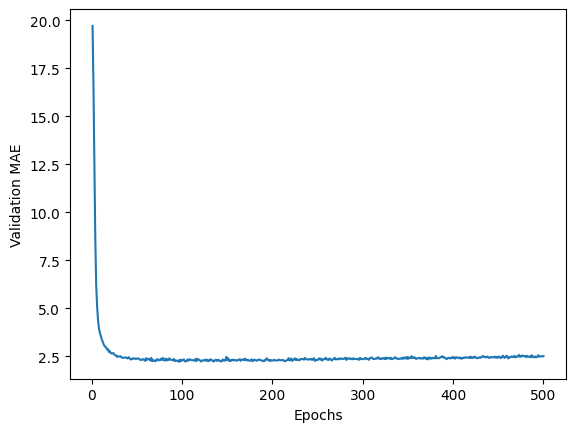

In [125]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

# 은닉층 추가 및 유닛 수를 수정해본 결과 별다른 차이는 보이지 않았다.

**Plotting validation scores, excluding the first 10 data points**

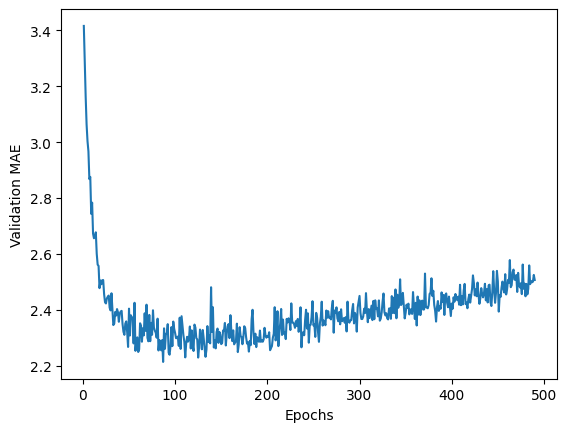

In [126]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [127]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 16.7929 - mae: 2.7136


In [128]:
test_mae_score

2.713582754135132

### Generating predictions on new data

In [129]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 2ms/step


array([8.555968], dtype=float32)

### Wrapping up

## Summary

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.